# 03 – Evaluasi Model & Visualisasi Prediksi

Tujuan:
- Menggunakan model terbaik (berdasarkan validasi) untuk evaluasi pada test set.
- Menghitung test accuracy dan error ratio.
- Membuat confusion matrix untuk melihat pola kesalahan antar kelas.
- Melihat contoh gambar yang diprediksi model, termasuk probabilitas top-3.


In [7]:
import sys
import pathlib

import matplotlib.pyplot as plt
from PIL import Image

# Setup path
PROJECT_ROOT = pathlib.Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

from src import config
from src import evaluate
from src import utils

print("Project root :", PROJECT_ROOT)
print("Best model   :", config.BEST_MODEL_PATH)


Project root : /home/tumanggors/github/neuralcomp/simplicity_cnn
Best model   : /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


In [8]:
utils.set_seed()

best_model = evaluate.load_best_model()
best_model.summary()


==> Loading best model from: /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/models/simplicity_cnn_tf_best.h5


Model: "simplicity_cnn_tf"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block1_conv (Conv2D)       │ (None, 224, 224, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block1_bn                  │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block1_relu (ReLU)         │ (None, 224, 224, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block2_conv (Conv2D)       │ (None, 224, 224, 32)   │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block2_bn                  │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block2_relu (ReLU)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block3_conv (Conv2D)       │ (None, 224, 224, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block3_bn                  │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_block3_relu (ReLU)         │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling          │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,571 (95.98 KB)

 Trainable params: 24,346 (95.10 KB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 1 (8.00 B)

In [9]:
test_loss, test_acc, error_ratio = evaluate.evaluate_on_test(best_model)

print("\nRingkasan evaluasi test set:")
print(f"- Test loss   : {test_loss:.4f}")
print(f"- Test acc    : {test_acc:.4f}")
print(f"- Error ratio : {error_ratio:.4f}")


==> Loading test dataset...
==> Evaluating on test set...
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.6650 - loss: 1.1029
Test loss      : 1.1029
Test accuracy  : 0.6650
Error ratio    : 0.3350

Ringkasan evaluasi test set:
- Test loss   : 1.1029
- Test acc    : 0.6650
- Error ratio : 0.3350


==> Building confusion matrix on test set...


2025-11-10 10:29:33.304802: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion matrix disimpan di: /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/figures/confusion_matrix_test.png
Confusion matrix shape: (10, 10)


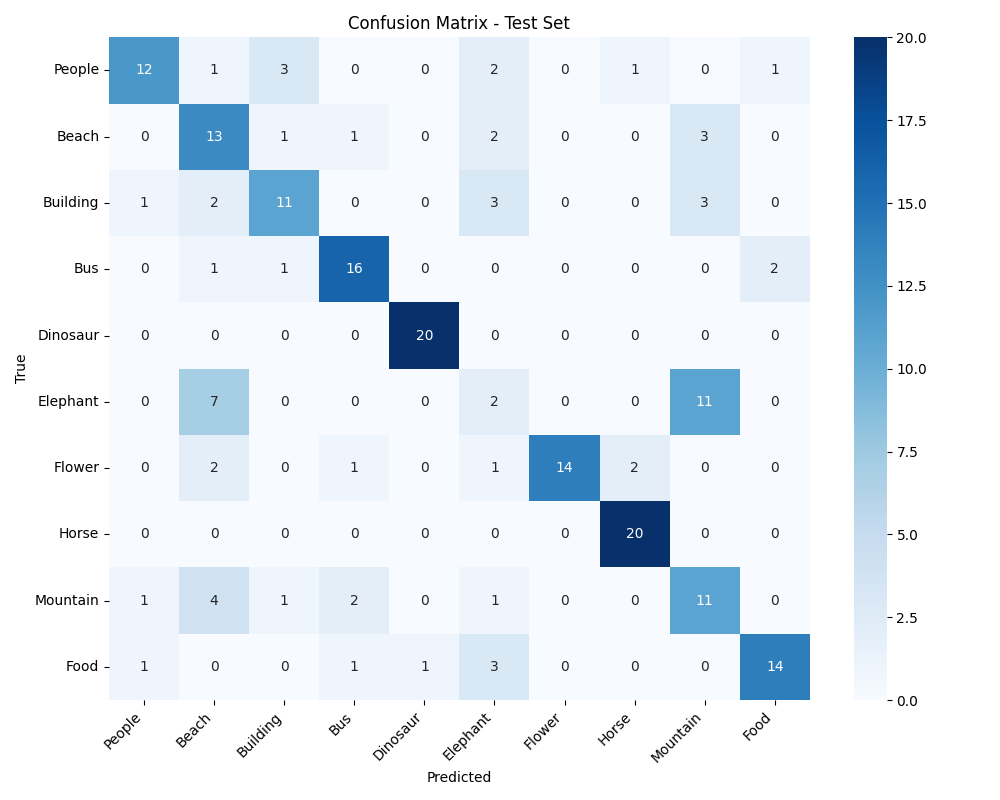

In [10]:
cm = evaluate.build_confusion_matrix(best_model)

print("Confusion matrix shape:", cm.shape)

# Tampilkan file gambar yang sudah disimpan
from IPython.display import Image as IPyImage, display

cm_path = config.CONF_MAT_FIG_PATH
display(IPyImage(filename=str(cm_path)))


==> Visualizing 9 sample predictions (mencari kelas berbeda)...
Contoh prediksi disimpan di: /home/tumanggors/github/neuralcomp/simplicity_cnn/outputs/figures/sample_predictions_test.png


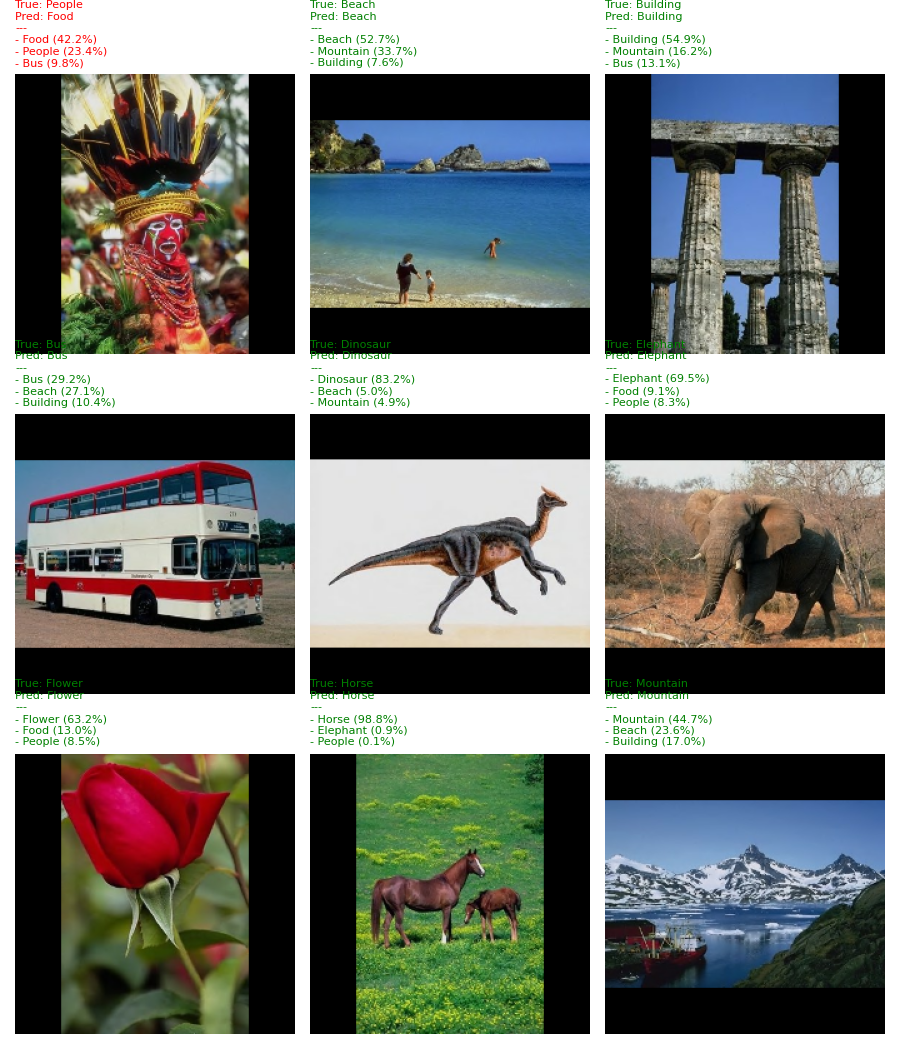

In [11]:
evaluate.visualize_sample_predictions(best_model, num_examples=9)

sample_path = config.FIGURE_DIR / "sample_predictions_test.png"
from IPython.display import Image as IPyImage, display

display(IPyImage(filename=str(sample_path)))


## Diskusi Hasil Evaluasi

Beberapa hal yang bisa diamati (diisi setelah melihat hasil):

- **Test accuracy**: seberapa baik model menggeneralisasi ke test set.
- **Error ratio**: 1 - accuracy, memberikan perspektif berapa banyak prediksi salah.
- **Confusion matrix**:
  - Baris = kelas sebenarnya.
  - Kolom = kelas prediksi.
  - Pola diagonal kuat berarti model konsisten benar di kelas tersebut.
  - Off-diagonal tinggi menandakan kelas-kelas yang sering saling tertukar.

Hal-hal yang bisa diperhatikan:
- Kelas mana yang memiliki akurasi per kelas paling rendah?
- Apakah ada pasangan kelas yang sering tertukar (misalnya `class_3` dan `class_4`)?
- Apakah perlu:
  - augmentasi tambahan,
  - penyesuaian arsitektur (misalnya menambah depth),
  - atau penyesuaian hyperparameter training?

Catatan ini bisa dijadikan bahan langsung untuk bab Pembahasan di laporan.

